# LUCJ Demo

The **Local Unitary Cluster Jastrow (LUCJ) ansatz** is a hardware-efficient quantum circuit ansatz introduced in [this paper](https://arxiv.org/pdf/2405.05068).

This tutorial demonstrates how to estimate probabilities for measurement outcomes from LUCJ circuits using the Extended Matchgate Simulator. 

**Prerequisites:** Please ensure you have installed the latest version of `ffsim` to run this tutorial.

## Creating a LUCJ Circuit

Let's start by creating a large LUCJ circuit to demonstrate the probability estimation capabilities.

In [1]:
from extended_matchgate_simulator.utils_dev import make_parameterized_controlled_phase_circuit

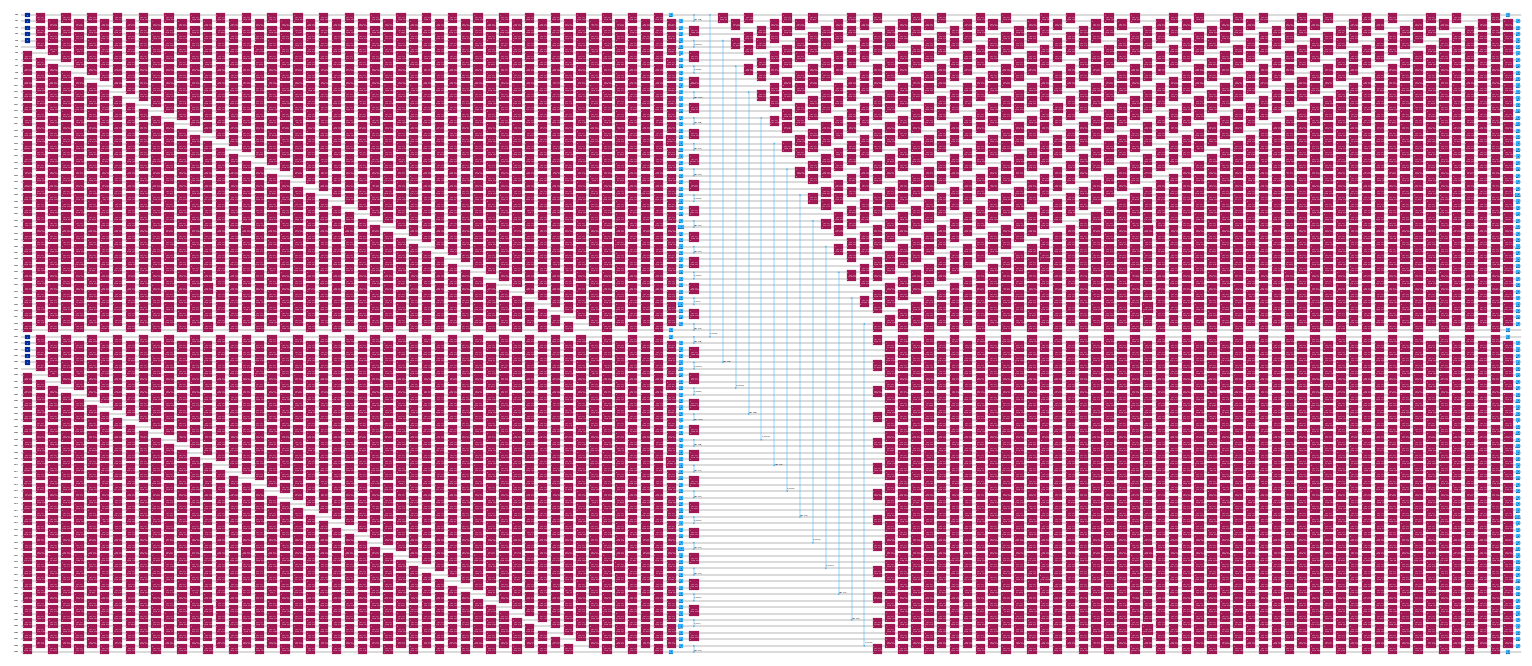

In [2]:
norb = 50
nelec = (5,5)
mean = 0
var = .001
qc = make_parameterized_controlled_phase_circuit(norb=norb, nelec=nelec, mean=mean, var=var, reduced_interaction=True, seed=123)
qc.decompose(reps=2).draw(fold=-1, scale=.1, output='mpl')

## Circuit Analysis

This circuit is quite substantial, containing over 5,000 matchgates. However, because we have sampled controlled-phase gate angles close to zero, our circuit has a small extent.

In [3]:
print(qc.decompose(reps=2).count_ops())

OrderedDict({'xx_plus_yy': 4900, 'p': 200, 'cp': 39, 'x': 10, 'global_phase': 1})


In [4]:
from extended_matchgate_simulator.utils import extract_circuit_data, ucj_to_compatible
transpiled = ucj_to_compatible(qc)
data = extract_circuit_data(transpiled)
print(data.extent)

1.8987154681602767


## Probability Estimation

As long as the **extent** of our circuit remains small (in this case, ~1.9), it will be relatively easy to estimate probabilities efficiently. 

We can use the same `outcome_probabilities()` function as before. The Extended Matchgate Simulator automatically applies LUCJ-specific optimizations during probability estimation routines.

In [5]:
from extended_matchgate_simulator.utils import is_lucj, ucj_to_compatible
transpiled = ucj_to_compatible(qc)
print("Is LUCJ:", is_lucj(transpiled))

Is LUCJ: True


In [6]:
from extended_matchgate_simulator.interface import outcome_probabilities
import time

bitstrings = [
0b0000000000000000000000000000000000000000000001111100000000000000000000000000000000000000000000011111,
0b0000000000000000000000000000000000000000001000111100000000000000000000000000000000000000000000011111,
0b0000000000000000000000000000000000000000000001111100000000000000000000000000000000000000010000001111,
0b0000000000000000000000000000000000000000000010111100000000000000000000000000000000000000000000101111,
0b0000000000000000000000000000000000000000000100111100000000000000000000000000000000000000000001001111
]

t1 = time.perf_counter()
probs = outcome_probabilities(circuit=transpiled, outcome_states=bitstrings, trajectory_count=1_000_000)
t2 = time.perf_counter()

print("Probabilities:", probs)
print("Time elapsed:", t2 - t1)

Probabilities: [9.99233245e-01 7.40157650e-07 2.02503737e-07 4.43074726e-09
 1.49666516e-08]
Time elapsed: 0.07651720798457973
